# Natural Language Processing

We will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. We will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

In [139]:
# Importing Packages 
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split 

In [140]:
# Read the Yelp Dataset
yelp = pd.read_csv("/Users/devangpapinwar/Downloads/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/yelp.csv")

In [141]:
# Get info
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [142]:
# Describe Numerical Data
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [143]:
# Get Head Elements
yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [144]:
# Create new column of length of text of reviews
yelp["length"] = yelp["text"].apply(len)
yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,2094
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,274
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,349
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186


<AxesSubplot:>

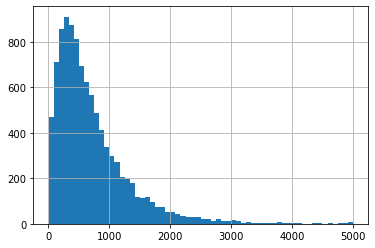

In [145]:
# Length Visualisation of Yelp reviews
yelp["length"].hist(bins = 60)

<AxesSubplot:>

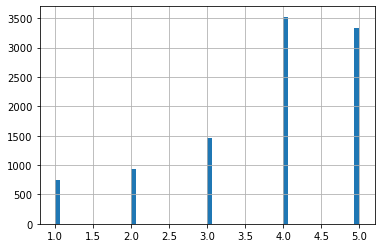

In [146]:
# Histogram repr of stars received
yelp["stars"].hist(bins=60)

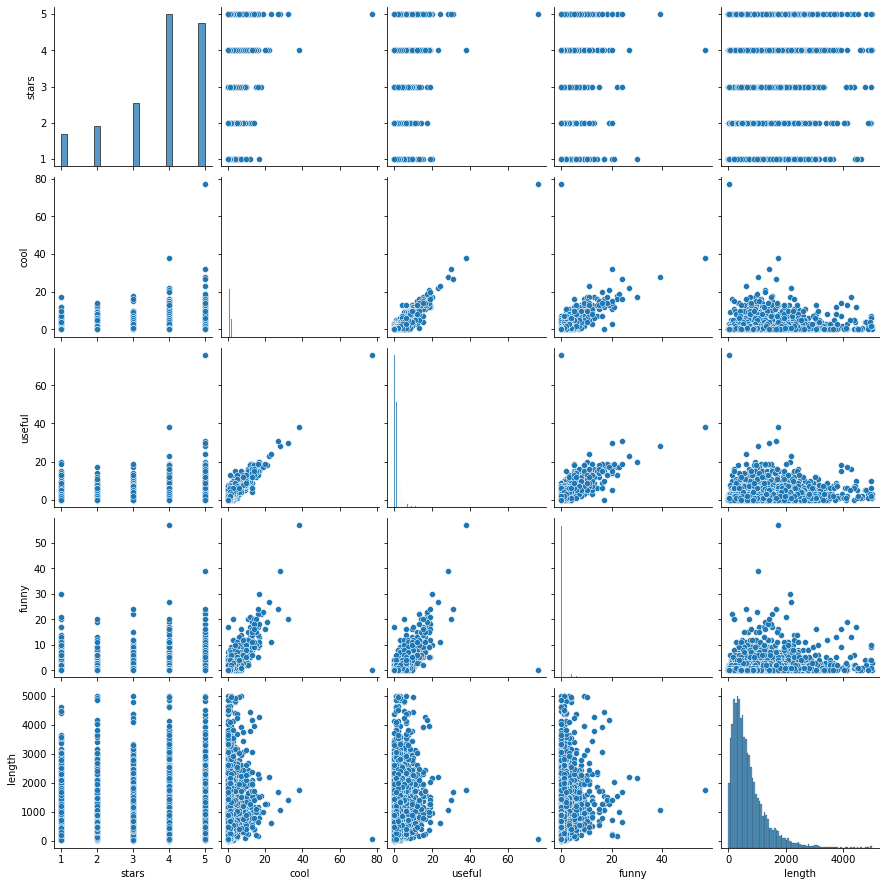

In [147]:
# Pairwise relationship between the columns of the dataframe
sb.pairplot(yelp)

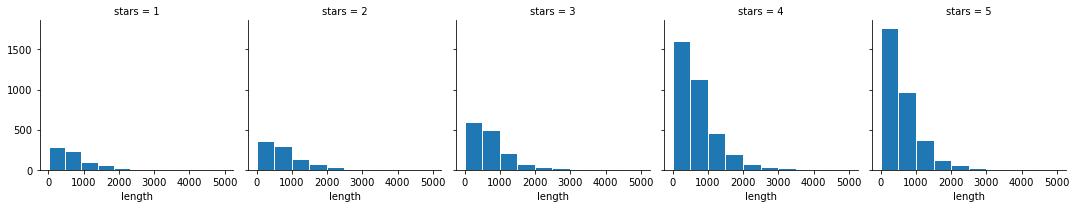

In [148]:
# Relationship of Stars received on x length of reviews
graph = sb.FacetGrid(yelp , col="stars")
graph.map(mpl.hist , "length"  , edgecolor = "w")


<AxesSubplot:xlabel='stars', ylabel='length'>

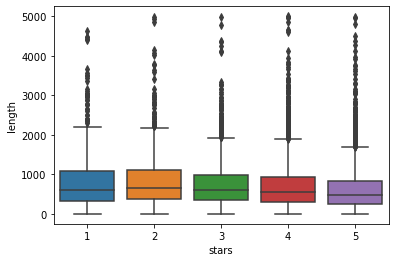

In [149]:
# Gets Median data of dataframe
sb.boxplot(x="stars" , y="length" ,data=yelp)

In [150]:
# Columns 
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'length'],
      dtype='object')

In [151]:
# Get stars data in comparison to the cool useful features
yelp.groupby(["stars"]).describe()

cool                                                useful            \
        count      mean       std  min  25%  50%  75%   max   count      mean   
stars                                                                           
1       749.0  0.576769  1.474759  0.0  0.0  0.0  1.0  17.0   749.0  1.604806   
2       927.0  0.719525  1.491182  0.0  0.0  0.0  1.0  14.0   927.0  1.563107   
3      1461.0  0.788501  1.602576  0.0  0.0  0.0  1.0  18.0  1461.0  1.306639   
4      3526.0  0.954623  2.034367  0.0  0.0  0.0  1.0  38.0  3526.0  1.395916   
5      3337.0  0.944261  2.484583  0.0  0.0  0.0  1.0  77.0  3337.0  1.381780   

       ... funny        length                                              \
       ...   75%   max   count        mean         std   min    25%    50%   
stars  ...                                                                   
1      ...   1.0  30.0   749.0  826.515354  742.929304  11.0  315.0  600.0   
2      ...   1.0  20.0   927.0  842.256742  704.079491   7.0  365.5  656.0   
3      ...   1.0  24.0  1461.0  758.498289  627.594294   1.0  342.0  599.0   
4      ...   1.0  57.0  3526.0  712.923142  600.158476   2.0  307.0  551.5   
5      ...   1.0  39.0  3337.0  624.999101  558.578229   6.0  243.0  471.0   

                        
           75%     max  
stars                   
1      1075.00  4618.0  
2      1105.00  4972.0  
3       975.00  4975.0  
4       945.75  4997.0  
5       826.00  4986.0  

[5 rows x 32 columns]

In [152]:
# Get stars data in comparison to the cool useful features
stars = yelp.groupby("stars").mean()

In [153]:
# Correlation between stars and features of reviews
stars.corr

<bound method DataFrame.corr of            cool    useful     funny      length
stars                                          
1      0.576769  1.604806  1.056075  826.515354
2      0.719525  1.563107  0.875944  842.256742
3      0.788501  1.306639  0.694730  758.498289
4      0.954623  1.395916  0.670448  712.923142
5      0.944261  1.381780  0.608631  624.999101>

<AxesSubplot:>

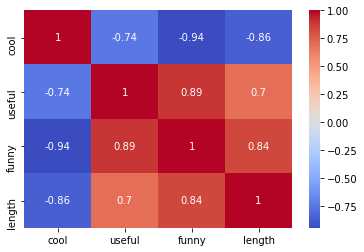

In [154]:
# Heatmap of correlation of stars with features
sb.heatmap(stars.corr() , cmap = "coolwarm" , annot = True)

In [155]:
# Get reviews data with either 1 or 5 stars
dataframe = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [156]:
# Get tail elements
dataframe.tail(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
9980,GHYOl_cnERMOhkCK_mGAlA,2011-07-03,Q-y3jSqccdytKxAyo1J0Xg,5,5 stars for the great $5 happy hour specials. ...,review,xZvRLPJ1ixhFVomkXSfXAw,6,6,4,393
9981,AX8lx9wHNYT45lyd7pxaYw,2008-11-27,IyunTh7jnG7v3EYwfF3hPw,5,We brought the entire family to Giuseppe's las...,review,fczQCSmaWF78toLEmb0Zsw,10,9,5,885
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673
9987,r-a-Cn9hxdEnYTtVTB5bMQ,2012-04-07,j9HwZZoBBmJgOlqDSuJcxg,1,The food is delicious. The service: discrimi...,review,toPtsUtYoRB-5-ThrOy2Fg,0,0,0,200
9989,mQUC-ATrFuMQSaDQb93Pug,2011-10-01,ta2P9joJqeFB8BzFp-AzjA,5,Great food and service! Country food at its best!,review,fKaO8fR1IAcfvZb6cBrs2w,0,1,0,49
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0,461


In [157]:
# Instantiate the text and stars data
X = dataframe['text']
y = dataframe['stars']

In [158]:
# Instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vc = CountVectorizer()

In [159]:
# Fit the text data on it to vectorise it
X = vc.fit_transform(X)

In [160]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [161]:
# Instantiate NaiveBayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [162]:
# Fit the training data on it 
nb.fit(X_train,y_train)

MultinomialNB()

In [163]:
# Make predictions
predictions = nb.predict(X_test)

In [164]:
# Generate Metrics 
from sklearn.metrics import classification_report , confusion_matrix
print("Classification Report : ", classification_report(y_test , predictions))
print("Confusion Matrix : \n" , confusion_matrix(y_test , predictions))

Classification Report :                precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226

Confusion Matrix : 
 [[159  69]
 [ 22 976]]


In [165]:
# Instantiating TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()

In [166]:
# Instantiating Pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [('bow' , CountVectorizer()),
    ('tfidf' , TfidfTransformer()) ,
    ('classifier' , MultinomialNB()) ,
])  

In [167]:
# Seperate the data we want to fit 
X = dataframe['text']
y = dataframe['stars']

In [168]:
# Split into the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [169]:
# Fit the training data
pipeline.fit(X_train , y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [170]:
# Make predictions
predictions = pipeline.predict(X_test)

In [171]:
# Calculate Metrics Report
print("Classification Report : ", classification_report(y_test , predictions))
print("Confusion Matrix : \n" , confusion_matrix(y_test , predictions))

Classification Report :                precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

Confusion Matrix : 
 [[  0 228]
 [  0 998]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
